In [3]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

In [3]:
X_train = pd.read_csv('../data/train/X_train.csv')
y_train = pd.read_csv('../data/train/y_train.csv')

X_test = pd.read_csv('../data/train/X_test.csv')
y_test = pd.read_csv('../data/train/y_test.csv')

In [4]:
def full_metrics(y_test, y_pred,model_name, n_classes=6):
    # Print performance metrics
    print('Performance of Decision Tree Algorithm with SMOTE Upsampling:\n')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', recall_score(y_test, y_pred, average='weighted'))
    print('F1 Score:', f1_score(y_test, y_pred, average='weighted'))
    
    # Initialize dictionaries for ROC curve data
    fpr = dict()
    tpr = dict()
    thresh = dict()
    
    # Calculate ROC curve for each class
    for i in range(n_classes):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred, pos_label=i)
    
    # Plot ROC curve
    colors = ['orangered', 'green', 'blue', 'yellow', 'purple', 'magenta']
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i % len(colors)], label=f'Class {i} vs Rest')
    
    plt.title(f"Multiclass ROC curve {model_name}")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()


##### Decision Tree Classifier

In [5]:
DT_classifier = DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train,y_train)
y_pred_DT = DT_classifier.predict(X_test)

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[142417   8958   1597    484    116     14]
 [  8751  30237   5131    844    168      7]
 [  1525   5414  20015   3447    391     39]
 [   466    878   3490  14419   1852    109]
 [   120    192    415   1886   6782    534]
 [    20     20     43    101    548   1735]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    153586
           1       0.66      0.67      0.67     45138
           2       0.65      0.65      0.65     30831
           3       0.68      0.68      0.68     21214
           4       0.69      0.68      0.69      9929
           5       0.71      0.70      0.71      2467

    accuracy                           0.82    263165
   macro avg       0.72      0.72      0.72    263165
weighted avg       0.82      0.82      0.82    263165

Accuracy: 0.8192768795242529
Precision: 0.81957851606325
Recall: 0.8192768795242529
F1 Score: 0.8194218662596064


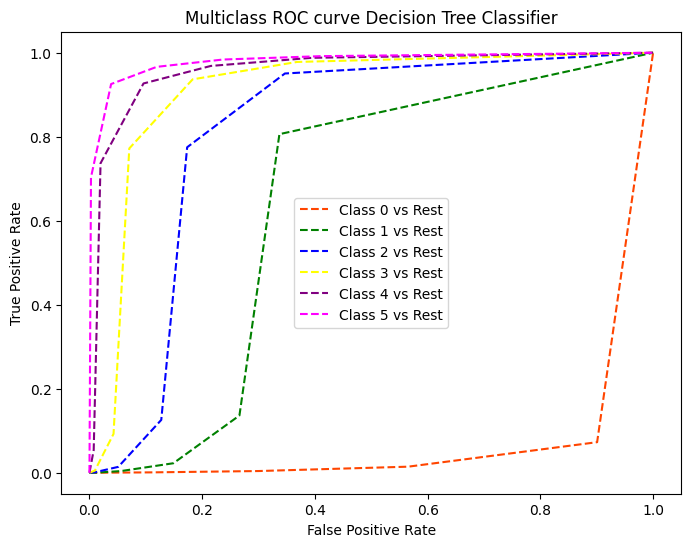

In [6]:
full_metrics(y_test,y_pred_DT,"Decision Tree Classifier")

##### Random Forest

In [7]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[148842   4449    239     49      6      1]
 [ 10317  30577   3919    289     33      3]
 [  2268   4854  20600   2936    169      4]
 [   962    489   3361  14720   1661     21]
 [   336     97    264   2006   6833    393]
 [    40     17     14     66    597   1733]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    153586
           1       0.76      0.68      0.71     45138
           2       0.73      0.67      0.70     30831
           3       0.73      0.69      0.71     21214
           4       0.73      0.69      0.71      9929
           5       0.80      0.70      0.75      2467

    accuracy                           0.85    263165
   macro avg       0.78      0.73      0.75    263165
weighted avg       0.84      0.85      0.84    263165

Accuracy: 0.8485360895255828
Precision: 0.8426226722560849
Recall: 0.8485360895255828
F1 Score: 0.8445101114623667


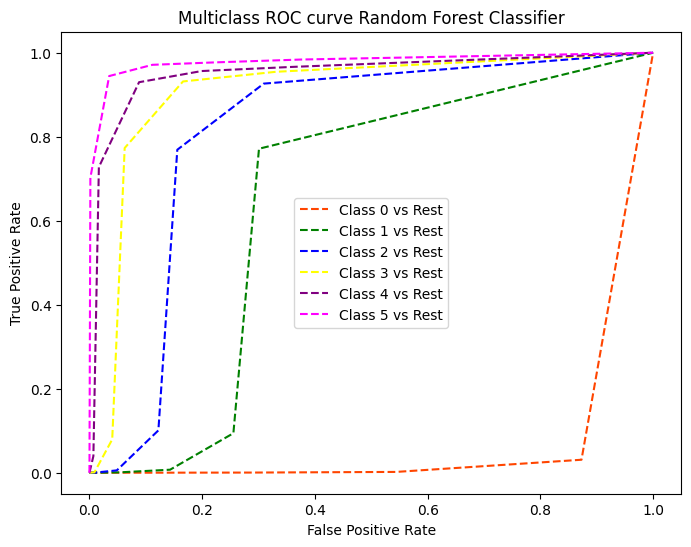

In [8]:
full_metrics(y_test,y_pred_RF,"Random Forest Classifier")

##### KNN Classifier

In [9]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[145103   6683   1051    551    173     25]
 [ 11796  28391   4106    629    192     24]
 [  3628   5893  17965   2935    374     36]
 [  1778   1364   3865  12594   1537     76]
 [   692    358    683   2206   5564    426]
 [    83     49     72    144    549   1570]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92    153586
           1       0.66      0.63      0.65     45138
           2       0.65      0.58      0.61     30831
           3       0.66      0.59      0.63     21214
           4       0.66      0.56      0.61      9929
           5       0.73      0.64      0.68      2467

    accuracy                           0.80    263165
   macro avg       0.71      0.66      0.68    263165
weighted avg       0.79      0.80      0.80    263165

Accuracy: 0.8024889327988144
Precision: 0.7941986698335082
Recall: 0.8024889327988144
F1 Score: 0.7972427894836841


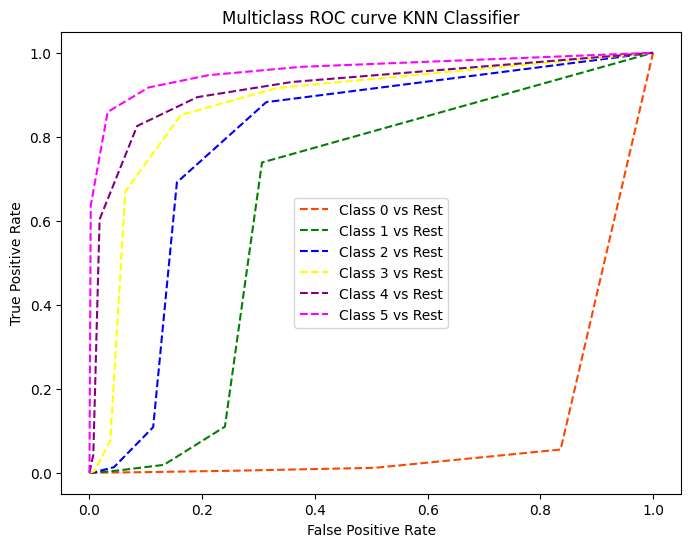

In [10]:
full_metrics(y_test,y_pred_knn,"KNN Classifier")

##### Xgboost

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[148621   3315   1021    564     59      6]
 [ 30327  10360   2929   1238    261     23]
 [ 14045   4780   7992   3318    661     35]
 [  6053   1873   2866   8388   1895    139]
 [  1741    534    763   1949   4442    500]
 [   136     54     62    157    529   1529]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84    153586
           1       0.50      0.23      0.31     45138
           2       0.51      0.26      0.34     30831
           3       0.54      0.40      0.46     21214
           4       0.57      0.45      0.50      9929
           5       0.69      0.62      0.65      2467

    accuracy                           0.69    263165
   macro avg       0.59      0.49      0.52    263165
weighted avg       0.65      0.69      0.65    263165

Accuracy: 0.6890429958391123
Precision: 0.6476252145050249
Recall: 0.6890429958391123
F1 Score: 0.6451169825883495


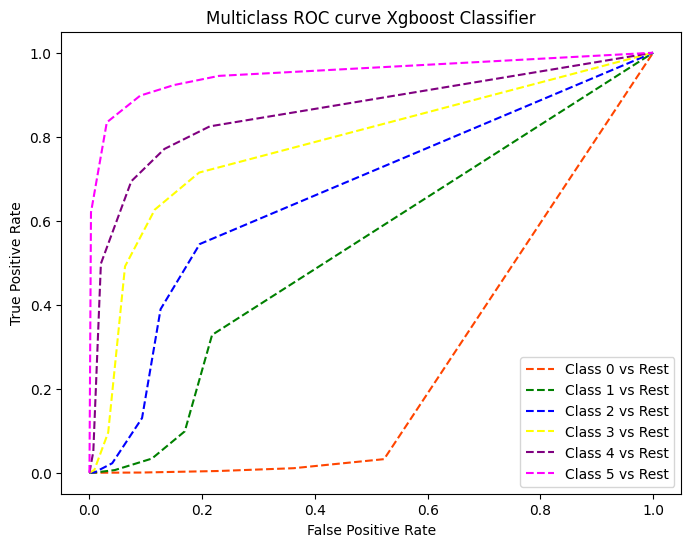

In [11]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_test)
full_metrics(y_test,y_pred_xg,"Xgboost Classifier")

##### Gaussian Naive Bayes

In [13]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[133081   1786   3256   3933   1296  10234]
 [ 33904   1074   1961   2820    991   4388]
 [ 21388    805   1680   2560   1053   3345]
 [ 13089    659   1367   2601   1029   2469]
 [  5031    345    504   1725    750   1574]
 [  1369     22     61    213    105    697]]
              precision    recall  f1-score   support

           0       0.64      0.87      0.74    153586
           1       0.23      0.02      0.04     45138
           2       0.19      0.05      0.08     30831
           3       0.19      0.12      0.15     21214
           4       0.14      0.08      0.10      9929
           5       0.03      0.28      0.06      2467

    accuracy                           0.53    263165
   macro avg       0.24      0.24      0.19    263165
weighted avg       0.46      0.53      0.46    263165

Accuracy: 0.5315410483916935
Precision: 0.4560520998146343
Recall: 0.5315410483916935
F1 Score: 0.46328936393362347


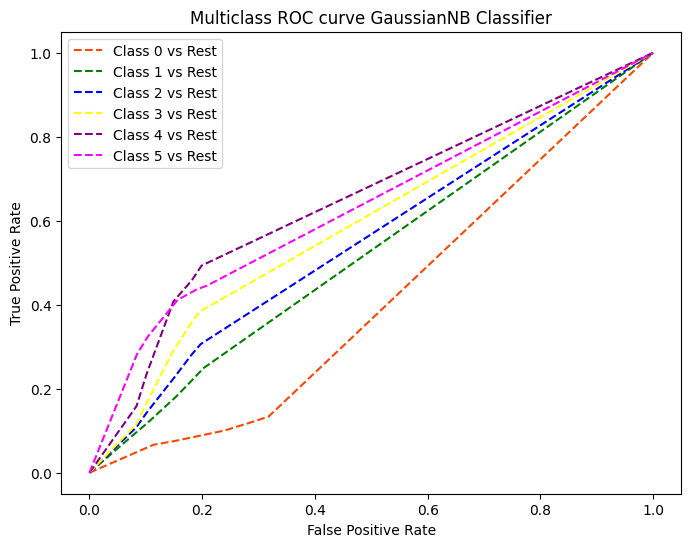

In [14]:
full_metrics(y_test,y_pred_NB,"GaussianNB Classifier")

#### Modeling with Oversampling

In [15]:
X_train_ups = pd.read_csv('../data/train/X_train_ups.csv')
y_train_ups = pd.read_csv('../data/train/y_train_ups.csv')

##### Decision Tree Classifier

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[140073  10077   2165    828    373     70]
 [  7390  30950   5515    955    278     50]
 [  1129   5212  20171   3702    550     67]
 [   280    801   3643  14238   2147    105]
 [    68    171    451   1995   6731    513]
 [    11     19     39     98    552   1748]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93    153586
           1       0.66      0.69      0.67     45138
           2       0.63      0.65      0.64     30831
           3       0.65      0.67      0.66     21214
           4       0.63      0.68      0.65      9929
           5       0.68      0.71      0.70      2467

    accuracy                           0.81    263165
   macro avg       0.70      0.72      0.71    263165
weighted avg       0.82      0.81      0.82    263165

Accuracy: 0.8128398533239602
Precision: 0.8180246226289659
Recall: 0.8128398533239602
F1 Score: 0.815179820111296


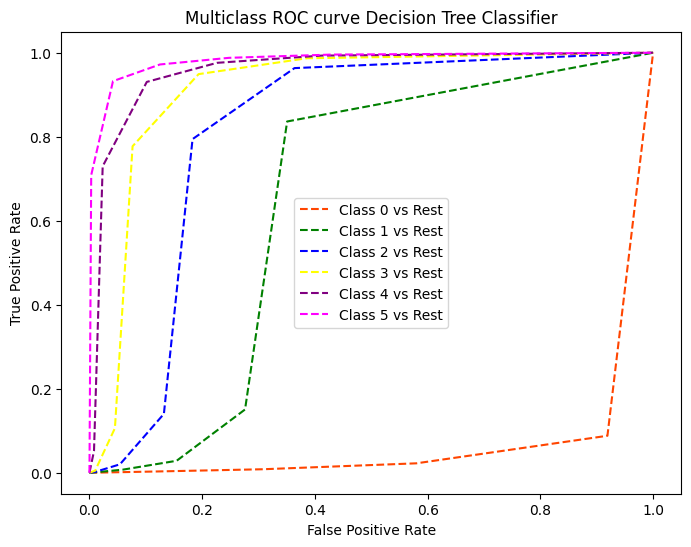

In [16]:
DT_classifier = DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train_ups,y_train_ups)
y_pred_DT = DT_classifier.predict(X_test)
full_metrics(y_test,y_pred_DT,"Decision Tree Classifier")

##### Random Forest Classifier

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[148842   4449    239     49      6      1]
 [ 10317  30577   3919    289     33      3]
 [  2268   4854  20600   2936    169      4]
 [   962    489   3361  14720   1661     21]
 [   336     97    264   2006   6833    393]
 [    40     17     14     66    597   1733]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    153586
           1       0.76      0.68      0.71     45138
           2       0.73      0.67      0.70     30831
           3       0.73      0.69      0.71     21214
           4       0.73      0.69      0.71      9929
           5       0.80      0.70      0.75      2467

    accuracy                           0.85    263165
   macro avg       0.78      0.73      0.75    263165
weighted avg       0.84      0.85      0.84    263165

Accuracy: 0.8485360895255828
Precision: 0.8426226722560849
Recall: 0.8485360895255828
F1 Score: 0.8445101114623667


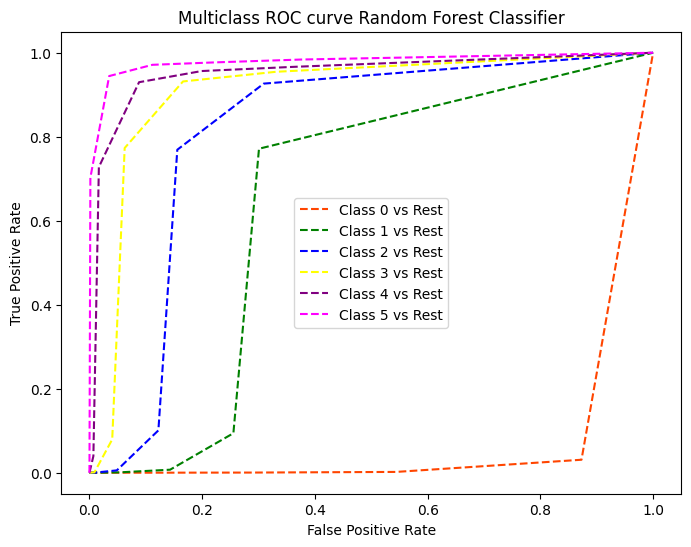

In [17]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)
full_metrics(y_test,y_pred_RF,"Random Forest Classifier")

##### KNN Classifier

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[145103   6683   1051    551    173     25]
 [ 11796  28391   4106    629    192     24]
 [  3628   5893  17965   2935    374     36]
 [  1778   1364   3865  12594   1537     76]
 [   692    358    683   2206   5564    426]
 [    83     49     72    144    549   1570]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92    153586
           1       0.66      0.63      0.65     45138
           2       0.65      0.58      0.61     30831
           3       0.66      0.59      0.63     21214
           4       0.66      0.56      0.61      9929
           5       0.73      0.64      0.68      2467

    accuracy                           0.80    263165
   macro avg       0.71      0.66      0.68    263165
weighted avg       0.79      0.80      0.80    263165

Accuracy: 0.8024889327988144
Precision: 0.7941986698335082
Recall: 0.8024889327988144
F1 Score: 0.7972427894836841


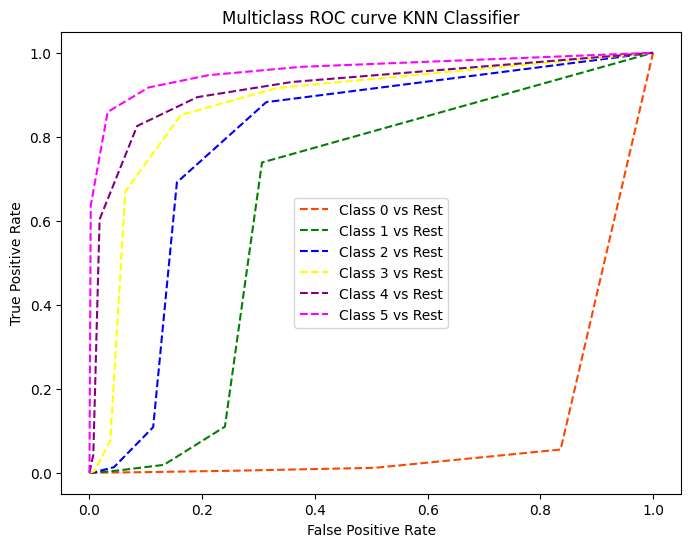

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
full_metrics(y_test,y_pred_knn,"KNN Classifier")

##### Xgboost Classifier

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[148621   3315   1021    564     59      6]
 [ 30327  10360   2929   1238    261     23]
 [ 14045   4780   7992   3318    661     35]
 [  6053   1873   2866   8388   1895    139]
 [  1741    534    763   1949   4442    500]
 [   136     54     62    157    529   1529]]
              precision    recall  f1-score   support

           0       0.74      0.97      0.84    153586
           1       0.50      0.23      0.31     45138
           2       0.51      0.26      0.34     30831
           3       0.54      0.40      0.46     21214
           4       0.57      0.45      0.50      9929
           5       0.69      0.62      0.65      2467

    accuracy                           0.69    263165
   macro avg       0.59      0.49      0.52    263165
weighted avg       0.65      0.69      0.65    263165

Accuracy: 0.6890429958391123
Precision: 0.6476252145050249
Recall: 0.6890429958391123
F1 Score: 0.6451169825883495


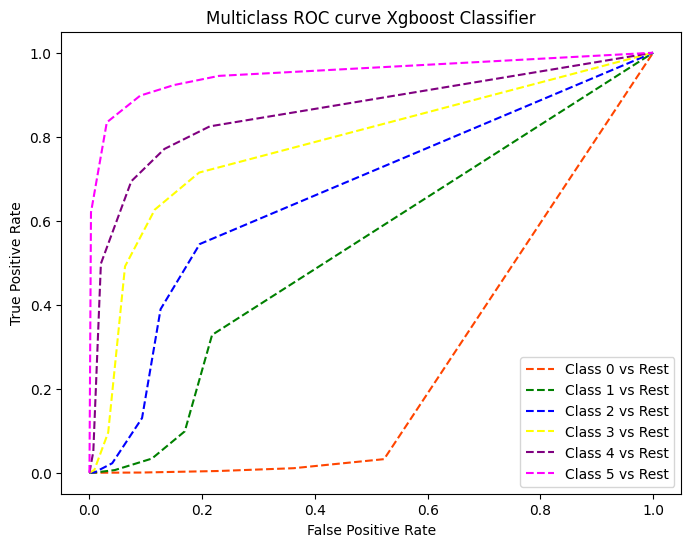

In [19]:
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_test)
full_metrics(y_test,y_pred_xg,"Xgboost Classifier")

##### Gaussian Naive Bayes

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[133081   1786   3256   3933   1296  10234]
 [ 33904   1074   1961   2820    991   4388]
 [ 21388    805   1680   2560   1053   3345]
 [ 13089    659   1367   2601   1029   2469]
 [  5031    345    504   1725    750   1574]
 [  1369     22     61    213    105    697]]
              precision    recall  f1-score   support

           0       0.64      0.87      0.74    153586
           1       0.23      0.02      0.04     45138
           2       0.19      0.05      0.08     30831
           3       0.19      0.12      0.15     21214
           4       0.14      0.08      0.10      9929
           5       0.03      0.28      0.06      2467

    accuracy                           0.53    263165
   macro avg       0.24      0.24      0.19    263165
weighted avg       0.46      0.53      0.46    263165

Accuracy: 0.5315410483916935
Precision: 0.4560520998146343
Recall: 0.5315410483916935
F1 Score: 0.46328936393362347


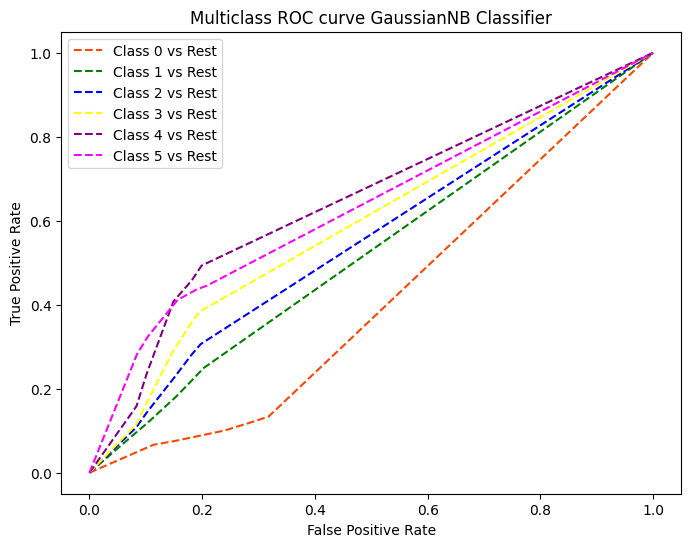

In [20]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)
full_metrics(y_test,y_pred_NB,"GaussianNB Classifier")

##### Modeling with UnderSampling

In [21]:
X_train_dres = pd.read_csv('../data/train/X_train_dres.csv')
y_train_dres = pd.read_csv('../data/train/y_train_dres.csv')

##### Decision Tree Classifier

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[37007 33452 28242 19920 16158 18807]
 [ 6010 11450  9452  7189  4847  6190]
 [ 2763  5076  8185  5867  3803  5137]
 [ 1113  2536  3763  6109  3356  4337]
 [  239   602  1039  1869  3136  3044]
 [    5    25    47   110   457  1823]]
              precision    recall  f1-score   support

           0       0.79      0.24      0.37    153586
           1       0.22      0.25      0.23     45138
           2       0.16      0.27      0.20     30831
           3       0.15      0.29      0.20     21214
           4       0.10      0.32      0.15      9929
           5       0.05      0.74      0.09      2467

    accuracy                           0.26    263165
   macro avg       0.24      0.35      0.21    263165
weighted avg       0.53      0.26      0.30    263165

Accuracy: 0.2572910531415652
Precision: 0.530201738111319
Recall: 0.2572910531415652
F1 Score: 0.3009882656747642


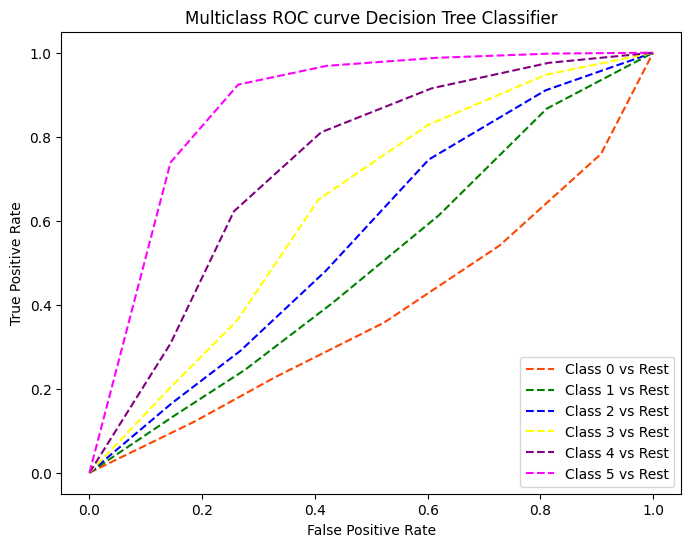

In [22]:
DT_classifier = DecisionTreeClassifier(criterion='gini')
DT_classifier.fit(X_train_dres,y_train_dres)
y_pred_DT = DT_classifier.predict(X_test)
full_metrics(y_test,y_pred_DT,"Decision Tree Classifier")

##### Random Forest Classifier

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[38798 28215 16023 16944 11414 42192]
 [ 5170 10946  6293  5584  3519 13626]
 [ 2198  4091  6553  4975  2508 10506]
 [ 1051  1825  2336  5882  2226  7894]
 [  200   434   548  1436  2922  4389]
 [    1     6    10    23   363  2064]]
              precision    recall  f1-score   support

           0       0.82      0.25      0.39    153586
           1       0.24      0.24      0.24     45138
           2       0.21      0.21      0.21     30831
           3       0.17      0.28      0.21     21214
           4       0.13      0.29      0.18      9929
           5       0.03      0.84      0.05      2467

    accuracy                           0.26    263165
   macro avg       0.26      0.35      0.21    263165
weighted avg       0.56      0.26      0.32    263165

Accuracy: 0.25522010905705544
Precision: 0.5615863012877057
Recall: 0.25522010905705544
F1 Score: 0.31533585372046297


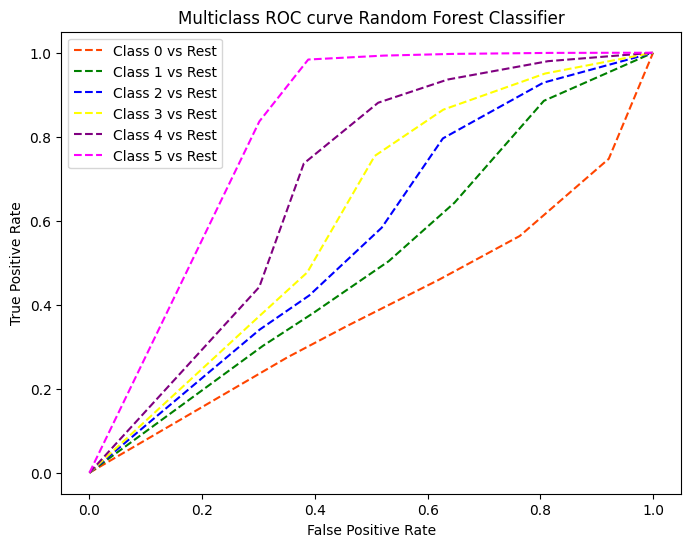

In [23]:
RF_classifier = RandomForestClassifier(n_estimators = 50, max_depth=80, bootstrap=False, max_features='sqrt', random_state=0)
RF_classifier.fit(X_train_dres, y_train_dres)
y_pred_RF = RF_classifier.predict(X_test)
full_metrics(y_test,y_pred_RF,"Random Forest Classifier")

##### Xgboost

Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[41961 35150 29562 21818  7501 17594]
 [ 5253 11790  9819  8178  2857  7241]
 [ 1814  4887  8227  7158  2420  6325]
 [  708  1946  3406  6943  2536  5675]
 [  125   493   731  1724  3008  3848]
 [    1     8    28    62   357  2011]]
              precision    recall  f1-score   support

           0       0.84      0.27      0.41    153586
           1       0.22      0.26      0.24     45138
           2       0.16      0.27      0.20     30831
           3       0.15      0.33      0.21     21214
           4       0.16      0.30      0.21      9929
           5       0.05      0.82      0.09      2467

    accuracy                           0.28    263165
   macro avg       0.26      0.37      0.23    263165
weighted avg       0.57      0.28      0.33    263165

Accuracy: 0.28096441396082306
Precision: 0.5657248599609188
Recall: 0.28096441396082306
F1 Score: 0.3302102172712983


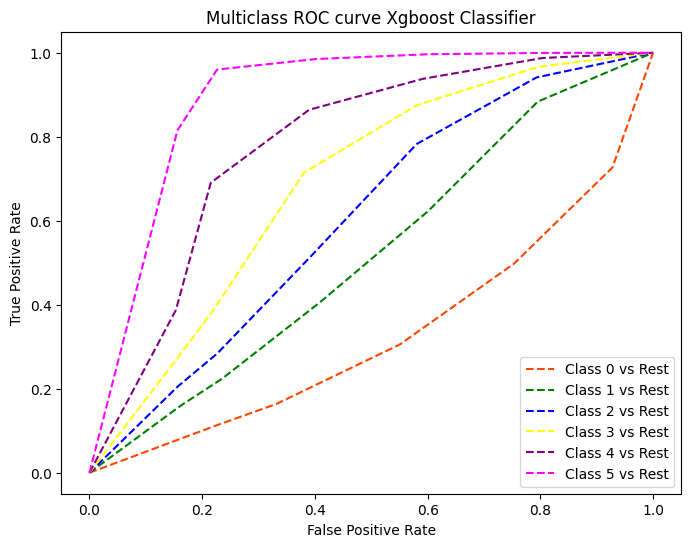

In [24]:
xg = XGBClassifier()
xg.fit(X_train_dres,y_train_dres)
y_pred_xg = xg.predict(X_test)
full_metrics(y_test,y_pred_xg,"Xgboost Classifier")

##### GaussianNB

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Decision Tree Algorithm with SMOTE Upsampling:

[[23948 16819  5661  4668 14096 88394]
 [ 5386  6206  1889  1359  4210 26088]
 [ 3108  4019  1331   974  2808 18591]
 [ 2043  2669   739   650  1832 13281]
 [  853  1634   383   377   690  5992]
 [  454   646    88    90   167  1022]]
              precision    recall  f1-score   support

           0       0.67      0.16      0.25    153586
           1       0.19      0.14      0.16     45138
           2       0.13      0.04      0.07     30831
           3       0.08      0.03      0.04     21214
           4       0.03      0.07      0.04      9929
           5       0.01      0.41      0.01      2467

    accuracy                           0.13    263165
   macro avg       0.19      0.14      0.10    263165
weighted avg       0.45      0.13      0.19    263165

Accuracy: 0.12861512739156042
Precision: 0.4468218409269256
Recall: 0.12861512739156042
F1 Score: 0.18806362978337937


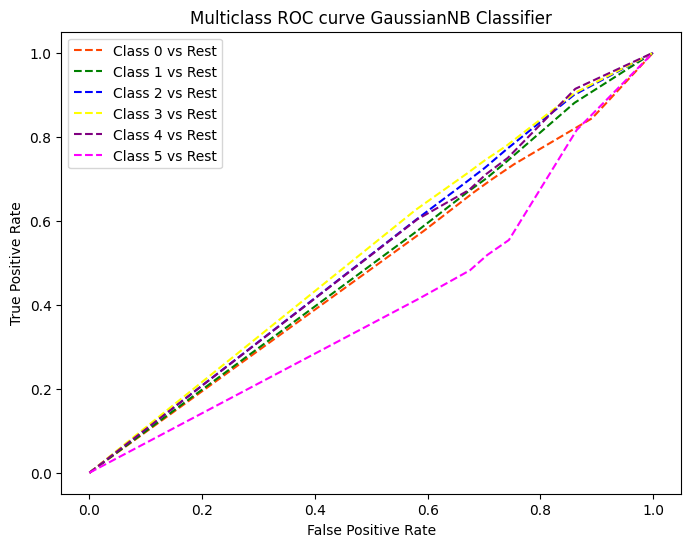

In [25]:
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_dres, y_train_dres)
y_pred_NB = NB_classifier.predict(X_test)
full_metrics(y_test,y_pred_NB,"GaussianNB Classifier")